<h2 style="color: green"> Import all the dependencies </h2>

In [1]:
import pandas as pd
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
mails = pd.DataFrame(pd.read_csv('emails.csv', encoding="ISO-8859-1", usecols=['v1', 'v2']))

In [3]:
mails.shape

(5572, 2)

In [4]:
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mails.columns = ['label', 'message']
mails.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
list(mails.groupby("label"))

[('ham',
       label                                            message
  0      ham  Go until jurong point, crazy.. Available only ...
  1      ham                      Ok lar... Joking wif u oni...
  3      ham  U dun say so early hor... U c already then say...
  4      ham  Nah I don't think he goes to usf, he lives aro...
  6      ham  Even my brother is not like to speak with me. ...
  ...    ...                                                ...
  5565   ham                                       Huh y lei...
  5568   ham              Will Ì_ b going to esplanade fr home?
  5569   ham  Pity, * was in mood for that. So...any other s...
  5570   ham  The guy did some bitching but I acted like i'd...
  5571   ham                         Rofl. Its true to its name
  
  [4825 rows x 2 columns]),
 ('spam',
       label                                            message
  2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
  5     spam  FreeMsg Hey there darling it's been 3 we

<h2 style="color:green"> Data cleaning / Text-Preprocessing </h2>

In [7]:
def preprocessing(mails):
    ps = PorterStemmer()
    corpus = []

    for i in range(len(mails)):
        content = re.sub('[^a-zA-Z]', ' ', mails['message'][i])
        content = content.lower().split()
        content = [ps.stem(word) for word in content if not word in set(stopwords.words("english"))]
        content = ' '.join(content)
        corpus.append(content)
    return corpus

In [8]:
corpus = preprocessing(mails)

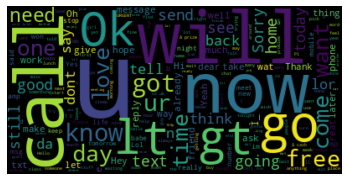

In [9]:
# Start with one review:
text = " ".join(mails.message[i] for i in range(len(mails)))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h2 style="color:green"> Bag of words model </h2>

In [10]:
# TFIDF-Vectorizer
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(corpus).toarray()

# Count Vectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

#This is spam colomn 0 - not spam, 1 - spam
y = pd.get_dummies(mails['label'], drop_first = True)
y = y.values

<h2 style="color:orange"> Train-test split </h2>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
y_train = y_train.reshape(-1, )

<h2 style="color:orange">Naive Bayes Classifier</h2>

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

<h2 style="color:orange">Support Vector Machine Classifier</h2>

In [13]:
model2 = SVC()
model2.fit(X_train, y_train)

SVC()

<h2 style="color:orange">Evaluation Metrics</h2>

In [14]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("Train data accuracy Score(Naive Bayes) : ", round(train_accuracy*100, 1))
print("Test data accuracy Score(Naive Bayes) : ", round(test_accuracy*100, 1))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", conf_matrix)

Train data accuracy Score(Naive Bayes) :  99.2
Test data accuracy Score(Naive Bayes) :  98.3
Confusion Matrix : 
 [[1179   17]
 [   7  190]]


In [15]:
y_train_pred2 = model2.predict(X_train)
y_pred2 = model2.predict(X_test)

train_accuracy2 = accuracy_score(y_train, y_train_pred2)
test_accuracy2 = accuracy_score(y_test, y_pred2)

print("Train data accuracy Score(Naive Bayes) : ", round(train_accuracy2*100, 1))
print("Test data accuracy Score(Naive Bayes) : ", round(test_accuracy2*100, 1))

conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix : \n", conf_matrix)

Train data accuracy Score(Naive Bayes) :  99.5
Test data accuracy Score(Naive Bayes) :  97.6
Confusion Matrix : 
 [[1195    1]
 [  33  164]]


<h2 style="color:orange">Predictions</h2>

Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed �1000 cash or �5000 prize!

As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there.

Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.

In [16]:
def vectorizeAndPredict(corpus):
    X = cv.transform(corpus).toarray()
    preds = model.predict(X)
    for i in preds:
        if(i): print("Not Spam.")
        else: print("Spam Email.")

In [17]:
t = int(input("Count of mails : "))
mails = {"message":[]}
while(t):
    mails["message"].append(input("Enter content of mail : ").strip())
    t -= 1
    
df = pd.DataFrame(mails)
df.head()

Count of mails : 2
Enter content of mail : Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed �1000 cash or �5000 prize!
Enter content of mail : Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.


,message
0,Please call our customer service representativ...
1,"Wen ur lovable bcums angry wid u, dnt take it ..."


In [18]:
corpus2 = preprocessing(df)
vectorizeAndPredict(corpus2)

Not Spam.
Spam Email.


<h2 style="color:green">Saving and Loading Models</h2>

In [19]:
import pickle

In [20]:
pickle.dump(model, open('spam.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

In [21]:
model = pickle.load(open('spam.pkl', 'rb'))
cv = pickle.load(open('vectorizer.pkl', 'rb'))